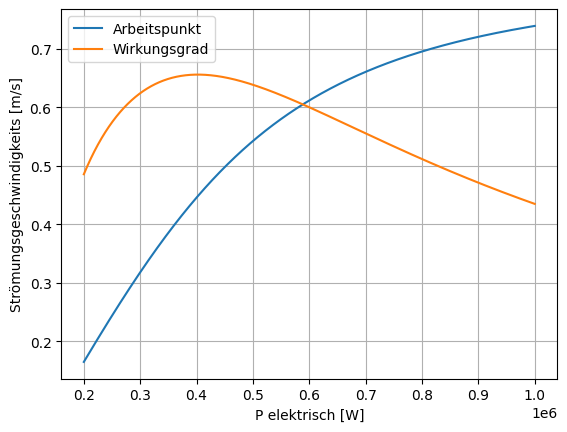

In [2]:
import matplotlib.pyplot as plt
import numpy as np


#Grössen======================================================================================================================
ro=1000
H=60
g=9.81
A=0.05
L=500
Zeta=0.002
p0=1e6

Pel= np.arange(0.2*1e6,1e6+200,200)

b= p0/2

x0= 1 #Startwert
tol = 1e-6
#Funktionen=======================================================================================================================

def newton(func, funcderiv, x, tol, Pel):

    def f(Iv, a):
        f=eval(func)
        return f

    def df(Iv, a):
        df=eval(funcderiv)
        return df

    length = len(Pel)
    Value = np.empty(length)
    Values_n = np.empty(length)
    n = 0
    q = 0
    w = 10
    i = 1
    for PelElement in Pel:
        a = (4 / 27) * (p0 ** 3) / ((((PelElement - 1e5)) ** 2))

        while(abs(w - i)>tol):
            w = x
            i = x - (f(x, a)/df(x, a))
            x = i
            n += 1

        Value[q] = x
        Values_n[q] = n

        w = 10
        i = 1
        q += 1
    maxN = max(Values_n)
    minN = min(Values_n)

    #print(f"Schnittpunkt bei {x} nach {n} interationen")
    return Value, maxN, minN


def wirk(): #n
    return ro*g*H*Iv/Pel



#Iv = 2
#base = p0 - a*(Iv)**2 - b*(Iv)**3-ro*g*H-L*Zeta*(ro/2)*(Iv/A)**2
#=======================================================================================================================

Iv, maxN, minI = newton("p0 - a*(Iv)**2 - b*(Iv)**3 - ro*g*H - L*Zeta*(ro/2)*(Iv/A)**2", "- 2*a*(Iv) - 3*b*(Iv)**2-2*L*Zeta*(ro/2)*(Iv/(A**2))", x0, tol, Pel)


plt.plot(Pel,Iv, label='Arbeitspunkt')
plt.plot(Pel,wirk(), label='Wirkungsgrad')
plt.legend()
plt.grid()
plt.xlabel('P elektrisch [W]')
plt.ylabel('Strömungsgeschwindigkeits [m/s]')
plt.show()